In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib_inline
import random
import sqlite3

# for better viz
import pprint
import warnings

warnings.filterwarnings("ignore")

In [2]:
# set random seed
random.seed(42)

# for viewing more data in the dataframe
pd.set_option("display.max_rows", 40)
pd.set_option("display.max_columns", 500)

# Data understanding

The data understanding phase starts with an initial data collection and proceeds with activities in order to get familiar with the data, to identify data quality problems, to discover first insights into the data or to detect interesting subsets to form hypotheses for hidden information.

## Data collection

In [3]:
# I assume existing folder data in the root directory with downloaded archive.zip from https://www.kaggle.com/datasets/mohdph/saudi-arabia-real-estate-dataset
!unzip -o ../data/archive.zip -d ../data/
!mv ../data/database.db ../data/database.sqlite

Archive:  ../data/archive.zip
  inflating: ../data/database.db     


In [3]:
# reading the data into a dataframe
con = sqlite3.connect("../data/database.sqlite")
df = pd.read_sql_query("SELECT * from Listings", con)

con.close()

<!-- ### task

Acquire within the project the data (or access to the data) listed in the
project resources. This initial collection includes data loading if necessary
for data understanding. For example, if you apply a specific tool for data
understanding, it makes perfect sense to load your data into this tool.
This effort possibly leads to initial data preparation steps.

Note: if you acquire multiple data sources, integration is an additional
issue, either here or in the later data preparation phase.

### output

List the dataset (or datasets) acquired, together with their locations
within the project, the methods used to acquire them and any problems
encountered. Record problems encountered and any solutions achieved
to aid with future replication of this project or with the execution of
similar future projects.
 -->

The initial dataset was obtained from the Kaggle platform, and it is publicly available by [this link](https://www.kaggle.com/datasets/mohdph/saudi-arabia-real-estate-dataset). After unzipping, I stored under the name `data/database.sqlite`. Personally, SQLite is not my favorite database, and I prefer to analyze the data using Python and its libraries such as `pandas`. After data cleaning, I will store the data in `.csv` format for future ease of use.

## Data description

In [5]:
# number of records and fields
df.shape  # (records, fields)

(663946, 48)

In [6]:
# head
df.head(n=5)

,user_id,id,uri,title,price,content,imgs,refresh,category,beds,livings,wc,area,type,street_width,age,last_update,street_direction,ketchen,ac,furnished,location.lat,location.lng,path,user.review,user.img,user.name,user.phone,user.iam_verified,user.rega_id,native.logo,native.title,native.image,native.description,native.external_url,rent_period,city,city_id,district,district_id,width,length,advertiser_type,create_time,has_extended_details,daily_rentable,createdAt,updatedAt
0,10065,4331,شارع-الياقوت-الدار-البيضاء-الرياض,"أرض للبيع في شارع الياقوت, الدار البيضاء, الرياض",1958400.0,تجاريه ش ياقوت ٦٠ مساحه ٨١٦ تقريبا,"[""000000000_1627687178830.jpg""]",1672495809,2,0.0,0.0,0.0,816.0,2.0,60.0,0.0,1672495824,4.0,0.0,0.0,0.0,24.548930,46.781390,/أراضي-للبيع/الرياض/جنوب-الرياض/حي-الدار-البيض...,3.83,,ابو زايد,0,1.0,2295425,None,None,None,None,None,0.0,الرياض,21,حي الدار البيضاء,424,25.0,32.0,None,1415294130,NaN,0.0,2023-01-01 14:13:28.553 +00:00,2023-01-01 14:13:28.553 +00:00
1,11005,4837,طريق-الملك-عبدالله-بن-عبدالعزيز-الفرعي-المغرزا...,أرض للبيع في طريق الملك عبدالله بن عبدالعزيز ا...,15078000.0,الارض على طريق الملك عبدالله على شارعين مظاهره...,"[""000000000_1627687181813.jpg""]",1672040788,2,0.0,0.0,0.0,1077.0,2.0,80.0,0.0,1672040803,4.0,0.0,0.0,0.0,24.754130,46.724820,/أراضي-للبيع/الرياض/شمال-الرياض/حي-المغرزات/طر...,4.56,551515516_1501071840092.jpg,مؤسسة بيت الأثرياء للعقارات,0,1.0,None,None,None,None,None,None,0.0,الرياض,21,حي المغرزات,566,NaN,NaN,None,1416054461,NaN,0.0,2023-01-01 14:52:38.169 +00:00,2023-01-01 14:52:38.169 +00:00
2,8017,5498,5-المملكة-العربية-السعودية-5498,أرض للبيع في 5 المملكة العربية السعودية,8057700.0,الارض استثماريه في محافظة البرك طريق جده جازان...,"[""506610555_1417214243205.jpg"",""506610555_1417...",1671819056,2,0.0,0.0,0.0,23022.0,3.0,15.0,0.0,1671819056,3.0,0.0,0.0,0.0,18.268720,41.516460,/أراضي-للبيع/محايل/حي-الروضة/5-المملكة-العربية...,NaN,506610555_1570358699065.jpg,راكان الشاعري,0,1.0,None,None,None,None,None,None,0.0,محايل,92,حي الروضة,4100,NaN,NaN,None,1417220044,NaN,0.0,2023-01-01 15:01:52.351 +00:00,2023-01-01 15:01:52.351 +00:00
3,13810,6520,شارع-Saher-Al-Garbee-St-ذهبان,"أرض للإيجار في شارع الهزاعية, حي العشيرية, جدة",50000.0,السلام عليكم ورحمة الله وبركاته\nوكل عام وانتم...,"[""504121665_1418232181483.jpg"",""504121665_1418...",1672190424,15,0.0,0.0,0.0,400.0,3.0,35.0,0.0,1672190424,4.0,0.0,0.0,0.0,21.892200,39.126540,/أراضي-للإيجار/جدة/شمال-جدة/حي-الرياض/شارع-Sah...,4.43,504121665_1614727198836.jpg,عصام آل جمعان,0,1.0,5907435,None,None,None,None,None,0.0,جدة,66,حي الرياض,3490,20.0,20.0,None,1418232587,NaN,0.0,2023-01-01 14:43:23.326 +00:00,2023-01-01 14:43:23.326 +00:00
4,5234,8847,طريق-الملك-خالد-حي-الثقبة-الخبر-الخبر-8847,أرض للبيع في طريق الملك خالد ، حي الثقبة ، الخ...,3000000.0,ارض للبيع لبناء شقق فندقيه او عمارات سكنيه خلف...,"[""567772202_1632148243568.png"",""000052346_1661...",1672253180,2,0.0,0.0,0.0,870.0,3.0,15.0,0.0,1672253180,7.0,0.0,0.0,0.0,26.285235,50.180363,/أراضي-للبيع/الخبر/حي-الثقبة/طريق-الملك-خالد-ح...,4.76,1621763009232.jpg,أساس الخليجيه العقاريه 922293,0,1.0,922293,None,None,None,None,None,0.0,الخبر,12,حي الثقبة,1060,NaN,NaN,None,1420232812,NaN,0.0,2023-01-01 14:38:46.004 +00:00,2023-01-01 14:38:46.004 +00:00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663946 entries, 0 to 663945
Data columns (total 48 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   user_id               663946 non-null  int64  
 1   id                    663946 non-null  int64  
 2   uri                   663946 non-null  object 
 3   title                 663925 non-null  object 
 4   price                 663946 non-null  float64
 5   content               663716 non-null  object 
 6   imgs                  663946 non-null  object 
 7   refresh               663946 non-null  int64  
 8   category              663946 non-null  int64  
 9   beds                  411337 non-null  float64
 10  livings               411827 non-null  float64
 11  wc                    409818 non-null  float64
 12  area                  663369 non-null  float64
 13  type                  161173 non-null  float64
 14  street_width          644964 non-null  float64
 15  

<!-- ### task

Examine the “gross” or “surface” properties of the acquired data and
report on the results.

### output

Describe the data which has been acquired, including: the format of
the data, the quantity of data, for example number of records and fields
in each table, the identities of the fields and any other surface features
of the data which have been discovered. Does the data acquired satisfy
the relevant requirements? -->

The dataset is made of `.sqlite` file, and it contains 1 table named `Listings`, which has `48` columns and `663946` rows in total. Dataset contains such features as user information, price, title, creation and update time, location, and other features related to the real estate. There are texts, dates, integers, and floats in the dataset, which can be further processed and analyzed.

For the current version of the project, the dataset has all relevant information, and it is ready for further analysis.

## Explore data

<!-- ----------

### task

This task tackles the data mining questions, which can be addressed
using querying, visualization and reporting. These include: distribution
of key attributes, for example the target attribute of a prediction task;
relations between pairs or small numbers of attributes; results of
simple aggregations; properties of significant sub-populations; simple
statistical analyses. These analyses may address directly the data mining goals; they may also contribute to or refine the data description
and quality reports and feed into the transformation and other data
preparation needed for further analysis.

### output

Describe results of this task including first findings or initial hypothesis and their impact on the remainder of the project. If appropriate,
include graphs and plots, which indicate data characteristics or lead
to interesting data subsets for further examination. -->

From the dataset I could observe that the price is skewed to the right, and there are some outliers in the dataset having too low and too much price. This means, that there is no system in this business to restrict too low and too high prices. Also, the dataset contains some missing values, and some of the columns are not relevant for the analysis.

Same we can say for the area parameter. There are some outliers in the dataset, having too big areas (which are impossible to have).

Given distribution of age, we can clearly see, that a lot of people do not want to share their age (too many 0 values), therefore we should take in an account that we have less features than we thought.

<Axes: xlabel='price', ylabel='Density'>

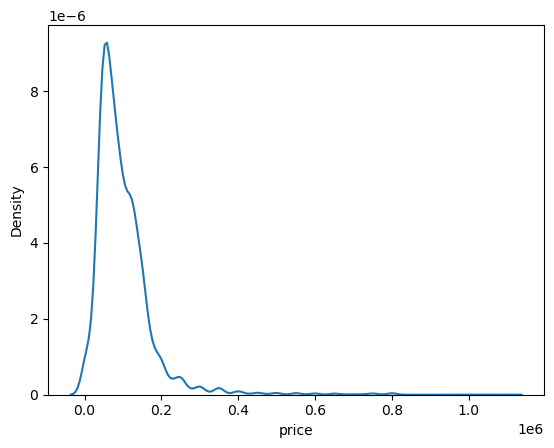

In [21]:
sns.kdeplot(df[df["category"] == 5].price.head(10000))

<Axes: xlabel='area', ylabel='Density'>

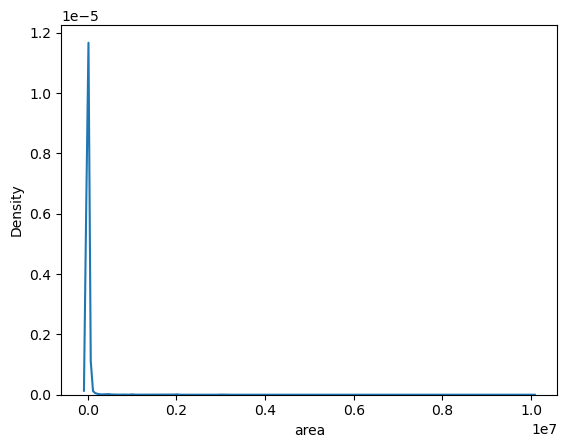

In [22]:
sns.kdeplot(df.area.head(10000))

<Axes: xlabel='age', ylabel='Count'>

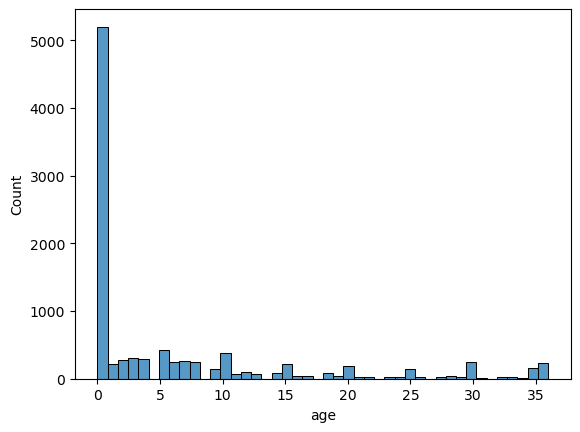

In [27]:
sns.histplot(df[df.age.notna()].age.head(10000))

<Axes: xlabel='age', ylabel='Count'>

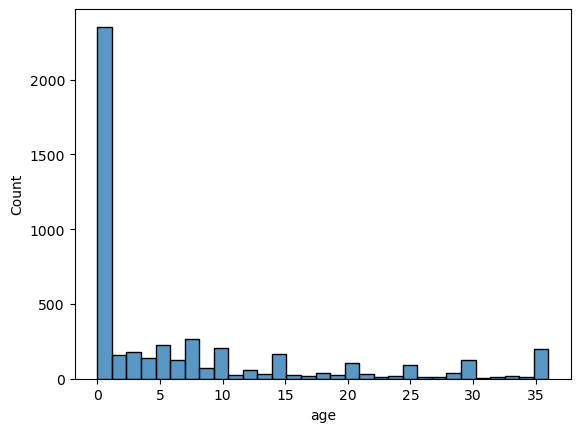

In [28]:
sns.histplot(df.age.head(10000))

<Axes: >

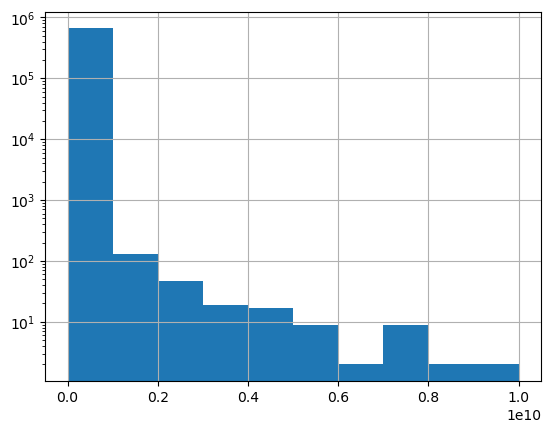

In [6]:
df.price.hist(log=True)

## Data quality

In [29]:
# check duplicate row
df[df.duplicated(keep=False)]

,user_id,id,uri,title,price,content,imgs,refresh,category,beds,livings,wc,area,type,street_width,age,last_update,street_direction,ketchen,ac,furnished,location.lat,location.lng,path,user.review,user.img,user.name,user.phone,user.iam_verified,user.rega_id,native.logo,native.title,native.image,native.description,native.external_url,rent_period,city,city_id,district,district_id,width,length,advertiser_type,create_time,has_extended_details,daily_rentable,createdAt,updatedAt


In [34]:
# check outlier
from scipy import stats

z_thr = 3.0
df[(np.abs(stats.zscore(df.select_dtypes(include=int))) > z_thr).any(axis=1)]

,user_id,id,uri,title,price,content,imgs,refresh,category,beds,livings,wc,area,type,street_width,age,last_update,street_direction,ketchen,ac,furnished,location.lat,location.lng,path,user.review,user.img,user.name,user.phone,user.iam_verified,user.rega_id,native.logo,native.title,native.image,native.description,native.external_url,rent_period,city,city_id,district,district_id,width,length,advertiser_type,create_time,has_extended_details,daily_rentable,createdAt,updatedAt
0,10065,4331,شارع-الياقوت-الدار-البيضاء-الرياض,"أرض للبيع في شارع الياقوت, الدار البيضاء, الرياض",1958400.0,تجاريه ش ياقوت ٦٠ مساحه ٨١٦ تقريبا,"[""000000000_1627687178830.jpg""]",1672495809,2,0.0,0.0,0.0,816.0,2.0,60.0,0.0,1672495824,4.0,0.0,0.0,0.0,24.548930,46.781390,/أراضي-للبيع/الرياض/جنوب-الرياض/حي-الدار-البيض...,3.83,,ابو زايد,0,1.0,2295425,None,None,None,None,None,0.0,الرياض,21,حي الدار البيضاء,424,25.0,32.0,None,1415294130,NaN,0.0,2023-01-01 14:13:28.553 +00:00,2023-01-01 14:13:28.553 +00:00
1,11005,4837,طريق-الملك-عبدالله-بن-عبدالعزيز-الفرعي-المغرزا...,أرض للبيع في طريق الملك عبدالله بن عبدالعزيز ا...,15078000.0,الارض على طريق الملك عبدالله على شارعين مظاهره...,"[""000000000_1627687181813.jpg""]",1672040788,2,0.0,0.0,0.0,1077.0,2.0,80.0,0.0,1672040803,4.0,0.0,0.0,0.0,24.754130,46.724820,/أراضي-للبيع/الرياض/شمال-الرياض/حي-المغرزات/طر...,4.56,551515516_1501071840092.jpg,مؤسسة بيت الأثرياء للعقارات,0,1.0,None,None,None,None,None,None,0.0,الرياض,21,حي المغرزات,566,NaN,NaN,None,1416054461,NaN,0.0,2023-01-01 14:52:38.169 +00:00,2023-01-01 14:52:38.169 +00:00
2,8017,5498,5-المملكة-العربية-السعودية-5498,أرض للبيع في 5 المملكة العربية السعودية,8057700.0,الارض استثماريه في محافظة البرك طريق جده جازان...,"[""506610555_1417214243205.jpg"",""506610555_1417...",1671819056,2,0.0,0.0,0.0,23022.0,3.0,15.0,0.0,1671819056,3.0,0.0,0.0,0.0,18.268720,41.516460,/أراضي-للبيع/محايل/حي-الروضة/5-المملكة-العربية...,NaN,506610555_1570358699065.jpg,راكان الشاعري,0,1.0,None,None,None,None,None,None,0.0,محايل,92,حي الروضة,4100,NaN,NaN,None,1417220044,NaN,0.0,2023-01-01 15:01:52.351 +00:00,2023-01-01 15:01:52.351 +00:00
3,13810,6520,شارع-Saher-Al-Garbee-St-ذهبان,"أرض للإيجار في شارع الهزاعية, حي العشيرية, جدة",50000.0,السلام عليكم ورحمة الله وبركاته\nوكل عام وانتم...,"[""504121665_1418232181483.jpg"",""504121665_1418...",1672190424,15,0.0,0.0,0.0,400.0,3.0,35.0,0.0,1672190424,4.0,0.0,0.0,0.0,21.892200,39.126540,/أراضي-للإيجار/جدة/شمال-جدة/حي-الرياض/شارع-Sah...,4.43,504121665_1614727198836.jpg,عصام آل جمعان,0,1.0,5907435,None,None,None,None,None,0.0,جدة,66,حي الرياض,3490,20.0,20.0,None,1418232587,NaN,0.0,2023-01-01 14:43:23.326 +00:00,2023-01-01 14:43:23.326 +00:00
4,5234,8847,طريق-الملك-خالد-حي-الثقبة-الخبر-الخبر-8847,أرض للبيع في طريق الملك خالد ، حي الثقبة ، الخ...,3000000.0,ارض للبيع لبناء شقق فندقيه او عمارات سكنيه خلف...,"[""567772202_1632148243568.png"",""000052346_1661...",1672253180,2,0.0,0.0,0.0,870.0,3.0,15.0,0.0,1672253180,7.0,0.0,0.0,0.0,26.285235,50.180363,/أراضي-للبيع/الخبر/حي-الثقبة/طريق-الملك-خالد-ح...,4.76,1621763009232.jpg,أساس الخليجيه العقاريه 922293,0,1.0,922293,None,None,None,None,None,0.0,الخبر,12,حي الثقبة,1060,NaN,NaN,None,1420232812,NaN,0.0,2023-01-01 14:38:46.004 +00:00,2023-01-01 14:38:46.004 +00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663903,371980,5490393,حي-شارع-عبدالله-بن-عبدالحكم-المصري-حي-البركة-ا...,مستودع للإيجار في حي ، شارع عبدالله بن عبدالحك...,30000.0,للإيجار بمساحة 200 متر مربع الموقع :خلف سوق ال...,"[""003719802_1691169594976.jpg"",""003719803_1691...",1691169934,17,NaN,NaN,NaN,200.0,NaN,5.0,NaN,1691171102,1.0,NaN,NaN,NaN,24.498367,39.571533,/مستودع-للإيجار/المدينة-المنورة/حي-البركة/حي-ش...,5.00,None,0599609055,0,1.0,None,None,None,None,None,None,NaN,المدينة المنورة,41,حي البركة,2930,10.0,20.0,owner,1691169933,NaN,NaN,2023-08-04 18:04:26.497 +00:00,2023-08-04 18:04:26.497 +00:00
663904,1

In [31]:
# check missing data
df.isnull().sum()

user_id                      0
id                           0
uri                          0
title                       21
price                        0
                         ...  
create_time                  0
has_extended_details    653524
daily_rentable          315493
createdAt                    0
updatedAt                    0
Length: 48, dtype: int64

In [32]:
# check number of unique value
df.nunique()

user_id                  94433
id                      663946
uri                     663923
title                   229137
price                    34960
                         ...  
create_time             655782
has_extended_details         1
daily_rentable               2
createdAt               663946
updatedAt               663946
Length: 48, dtype: int64

The dataset has no duplicates, which is good for the analysis. However, there are a lot of missing values in the dataset, and some of the columns are not relevant for the analysis, which should be properly handled. As it was previously mentioned, there are a lot of outliers in the dataset, which confirms the necessity of data cleaning.